# Disaster Tweets Classification

## Table of Contents

- 1.0 - Summary
- 2.0 - Importing our Data
- 3.0 - Exploratory Data Analysis (EDA)
    - 3.1 - Disaster Tweets vs Non-Disaster Tweets
    - 3.2 - Tweet Lengths and Word Counts
    - 3.3 - Most Common Keywords in Disaster Tweets
    - 3.4 - Most Common Locations of Disaster Tweets
- 4.0 - Data Cleaning
    - 4.1 - Missing Values
    - 4.2 - Text Pre-Processing
    - 4.3 - TF-IDF Vectorization
- 5.0 - Building our Models


## 1.0 - Summary

First, we need to define the problem, which is also outlined in the Kaggle description. The dataset contains 10,000 tweets and is intended for building a machine learning model to predict whether a tweet pertains to a real disaster. This has significant real-world value, as Twitter can play a crucial role in disseminating information during emergencies. Such a model could help disaster relief organizations and news agencies respond more quickly. Below, I will outline my approach to tackling this problem.

The first phase involves exploratory data analysis (EDA) to gain a better understanding of the dataset. By examining missing values, we can determine whether to remove or replace them as necessary.

The next critical step is text pre-processing, which prepares the data for interaction with machine learning models. The text pre-processing steps include: Removing punctuation, Removing stopwords, Converting all text to lowercase, Tokenization Lemmatization, Removing extra whitespace, Converting numbers to words (e.g., "1" to "one"). 

Additional steps may include handling emojis and removing special characters such as hashtags. Once the text is pre-processed, it is essential to vectorize the data. This step converts textual information into numerical representations, enabling machine learning models to process it effectively.

After completing these steps, we can train and test machine learning models to predict disasters from tweets. Although the dataset is pre-split into training and test data, the test dataset lacks a 'target' column, meaning we cannot directly assess test accuracy. As a result, we will further split the training dataset into training and validation sets.

Next, we will select one or more models and evaluate their performance using metrics such as accuracy, precision, recall, and F1 score. Finally, once the best-performing model is selected, we can use it to predict disaster-related tweets in the test dataset.

## 2.0 - Importing our Data

In [34]:
import pandas as pd 

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [35]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


As mentioned above, we can see that there is no target variable, which we can use for predictions later on. 

In [36]:
# Info 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [37]:
# Describe
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [38]:
# Shape 
print('There are {} rows and {} columns in our train dataset'.format(train.shape[0],train.shape[1]))

There are 7613 rows and 5 columns in our train dataset


## 3.0 - Exploratory Data Analysis

### 3.1 - Disaster Tweets vs Non-Disaster Tweets

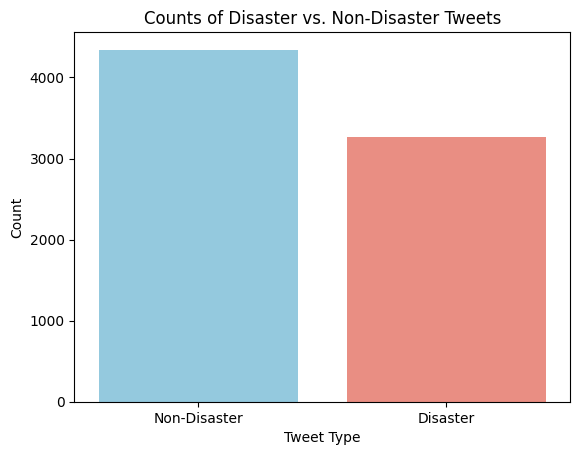

In [39]:
# Visualizing Disaster vs Non-Disaster
import matplotlib.pyplot as plt 
import seaborn as sns

# Countplot for 'target' column
colors = ['skyblue', 'salmon']
sns.countplot(x='target', data=train, palette=colors)

# Add labels and title
plt.xlabel('Tweet Type')
plt.ylabel('Count')
plt.title('Counts of Disaster vs. Non-Disaster Tweets')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster']) 
plt.show()



### 3.2 - Tweet Lengths and Word Counts

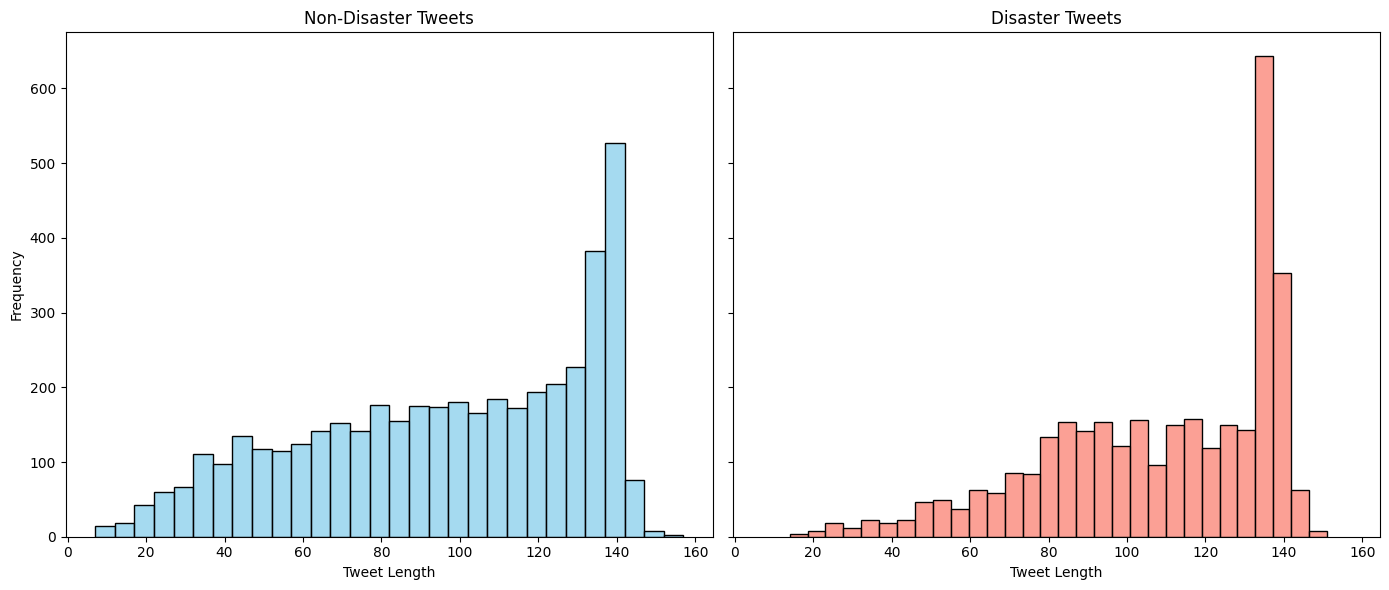

In [40]:
# Observing Tweet length in disaster vs non-disaster

# Calculate the length of each tweet
train['tweet_length'] = train['text'].apply(len)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot distribution for non-disaster tweets (target = 0)
sns.histplot(train[train['target'] == 0]['tweet_length'], bins=30, color='skyblue', ax=axes[0])
axes[0].set_title('Non-Disaster Tweets')
axes[0].set_xlabel('Tweet Length')
axes[0].set_ylabel('Frequency')

# Plot distribution for disaster tweets (target = 1)
sns.histplot(train[train['target'] == 1]['tweet_length'], bins=30, color='salmon', ax=axes[1])
axes[1].set_title('Disaster Tweets')
axes[1].set_xlabel('Tweet Length')
plt.tight_layout()
plt.show()

Both disasters and non-disasters have very similar distributions with the most common length of tweets being around 140 characters. 

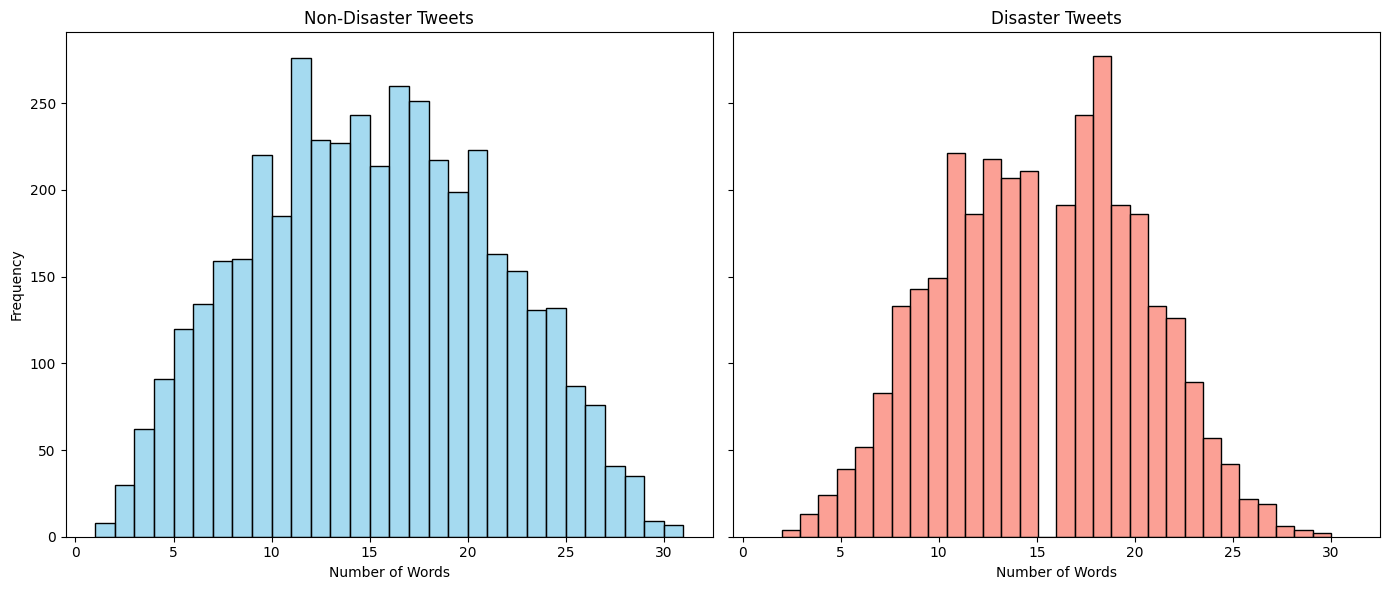

In [41]:
# Observing word count

# Calculate the number of words in each tweet
train['word_count'] = train['text'].apply(lambda x: len(x.split()))
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot distribution for non-disaster tweets (target = 0)
sns.histplot(train[train['target'] == 0]['word_count'], bins=30, color='skyblue', ax=axes[0])
axes[0].set_title('Non-Disaster Tweets')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')

# Plot distribution for disaster tweets (target = 1)
sns.histplot(train[train['target'] == 1]['word_count'], bins=30, color='salmon', ax=axes[1])
axes[1].set_title('Disaster Tweets')
axes[1].set_xlabel('Number of Words')
plt.tight_layout()
plt.show()

Similar to tweet length in characters, the distributions of word counts are very similar. 

### 3.3 - Most Common Keywords in Disaster Tweets

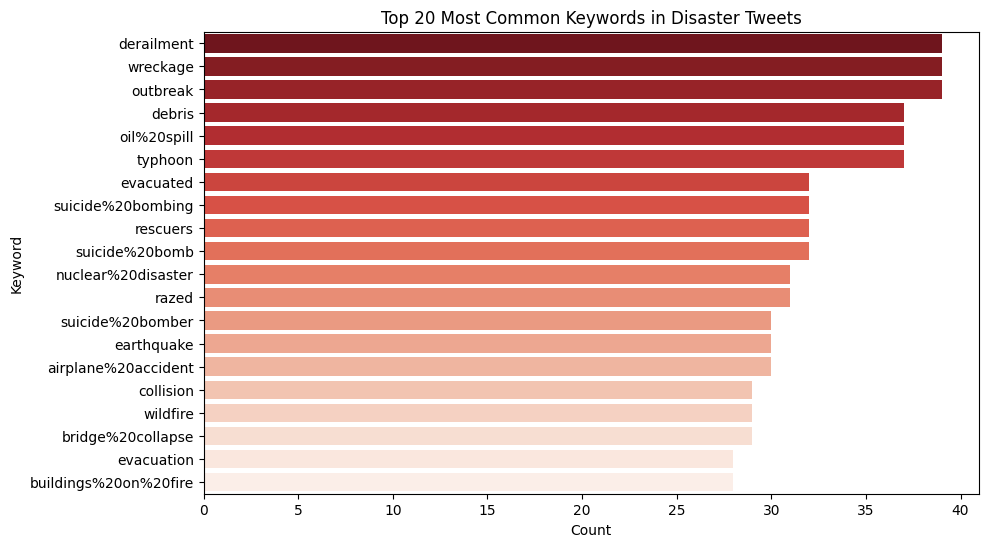

In [42]:
# Plotting the most common key words
import warnings
warnings.filterwarnings("ignore")

# Filter for disaster tweets
disaster_tweets = train[train['target'] == 1].dropna(subset=['keyword'])
top_keywords = disaster_tweets['keyword'].value_counts().head(20)

# Plot the top 20 keywords
plt.figure(figsize=(10, 6))
sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='Reds_r')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.title('Top 20 Most Common Keywords in Disaster Tweets')
plt.show()

### 3.4 - Most Common Locations of Disaster Tweets

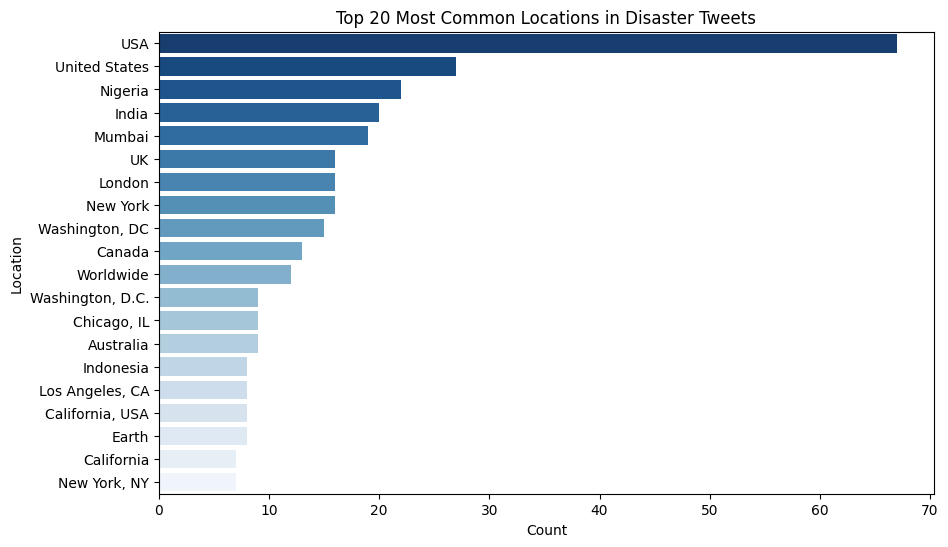

In [43]:
# Plotting the most common locations of disasters

# Filter for disaster tweets (target = 1) and drop missing locations
disaster_tweets = train[train['target'] == 1].dropna(subset=['location'])
top_locations = disaster_tweets['location'].value_counts().head(20)

# Plot the top 20 locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='Blues_r')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 20 Most Common Locations in Disaster Tweets')
plt.show()

In the above, we plotted the most common locations in disasters. We can quickly notice that many of these are repetitive. Examples include USA, United States, and other US cities. 

## 4.0 - Data Cleaning

### 4.1 - Missing Values

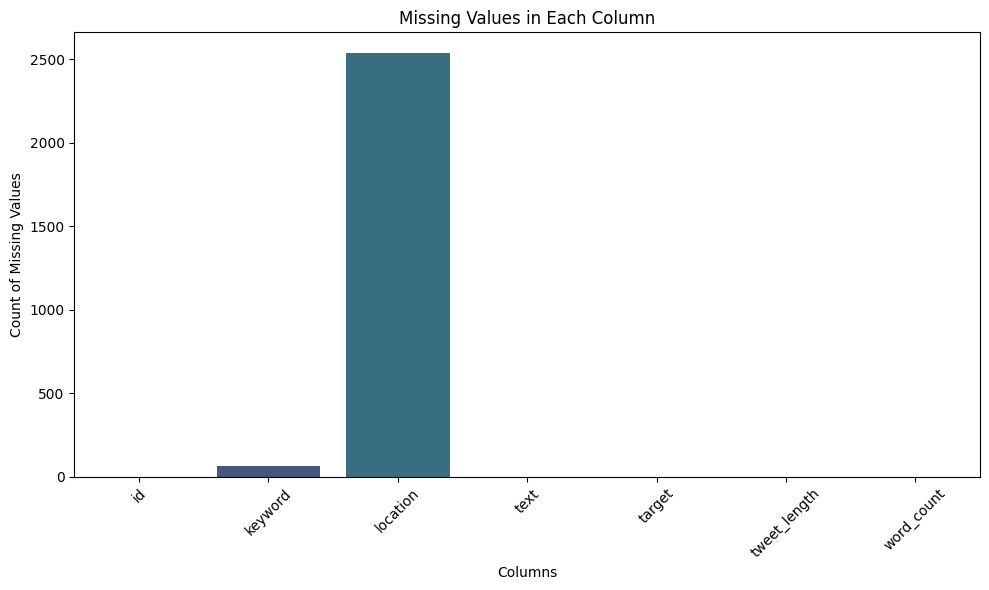

id                 0
keyword           61
location        2533
text               0
target             0
tweet_length       0
word_count         0
dtype: int64


In [44]:
# Plotting and Counting Missing values

# Count missing values in each column
missing_values = train.isnull().sum()

# Plot the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.title('Missing Values in Each Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(missing_values)

It appears the only missing data is in the keyword and location columns. Since there are a significant number of missing values, we don't want to lose this information entirely. Therefore, we will replace the missing values with 'unknown,' as these columns ultimately do not contribute substantial additional value to our analysis.

In [45]:
train['keyword'].fillna('unknown', inplace=True)
train['location'].fillna('unknown', inplace=True)

# Check if missing values are filled
print(train.isnull().sum())

id              0
keyword         0
location        0
text            0
target          0
tweet_length    0
word_count      0
dtype: int64


We can now see that we have no more missing values.

### 4.2 - Text Pre-Processing

In [46]:
import string
import spacy
import nltk
import inflect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')
inflect_engine = inflect.engine()

# Function to clean and preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Convert numbers to words
    tokens = [inflect_engine.number_to_words(word) if word.isdigit() else word for word in tokens]
    
    # Lemmatization
    tokens = [token.lemma_ for token in nlp(' '.join(tokens))]
    
    # Remove extra whitespaces and return the clean text
    return ' '.join(tokens).strip()


# Apply the preprocessing function to the 'text' column
train['cleaned_text'] = train['text'].apply(preprocess_text)

# Preview the cleaned text
train[['text', 'cleaned_text']].head()

,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake may allah forgive we
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,resident ask shelter place notify officer evac...
3,"13,000 people receive #wildfires evacuation or...",thirteen thousand people receive wildfire evac...
4,Just got sent this photo from Ruby #Alaska as ...,get send photo ruby alaska smoke wildfire pour...


We can see here that the text looks good and our next step is to vectorize our text before proceeding with our machine learning models. 

### 4.3 - TF-IDF Vectorization

Before building our models, it is important to convert the text data into a numerical format that the machine learning algorithms can process.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text
X = tfidf_vectorizer.fit_transform(train['cleaned_text'])

# Get the shape of the resulting TF-IDF matrix
print(f'TF-IDF matrix shape: {X.shape}')

# Convert to a DataFrame for easier handling
X_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


TF-IDF matrix shape: (7613, 5000)


## 5.0 - Building our Models

In [48]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your TF-IDF matrix and 'target' is the label column
y = train['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')


Training set shape: (6090, 5000)
Testing set shape: (1523, 5000)


### 5.1 - Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

train_accuracy_logistic = logistic_model.score(X_train, y_train)
print(f'Logistic Regression Training Accuracy: {train_accuracy_logistic:.2f}')

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Training Accuracy: 0.87
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       874
           1       0.81      0.66      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



### 5.2 - Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

train_accuracy_nb = nb_model.score(X_train, y_train)
print(f'Naive Bayes Training Accuracy: {train_accuracy_nb:.2f}')

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Training Accuracy: 0.86
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       874
           1       0.79      0.67      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



### 5.3 - SVM

In [51]:
from sklearn.svm import SVC

# Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Training accuracy
train_accuracy_svm = svm_model.score(X_train, y_train)
print(f'SVM Training Accuracy: {train_accuracy_svm:.2f}')

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Training Accuracy: 0.96
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       874
           1       0.82      0.65      0.73       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.79      0.79      0.79      1523



### 5.4 - Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Training accuracy
train_accuracy_rf = rf_model.score(X_train, y_train)
print(f'Random Forest Training Accuracy: {train_accuracy_rf:.2f}')

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Training Accuracy: 0.99
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       874
           1       0.76      0.67      0.71       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



### 5.5 - Evaluating our Models 

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Calculate training accuracy
    train_accuracy = model.score(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate test metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    return train_accuracy, test_accuracy, test_precision, test_recall, test_f1


In [54]:
# Initialize a list to store the metrics
metrics_list = []

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Calculate and store metrics for each model
for model_name, model in models.items():
    train_acc, test_acc, test_prec, test_rec, test_f1 = calculate_metrics(model, X_train, y_train, X_test, y_test)
    metrics_list.append({
        'Model': model_name,
        'Training Accuracy': round(train_acc, 2),
        'Test Accuracy': round(test_acc, 2),
        'Test Precision': round(test_prec, 2),
        'Test Recall': round(test_rec, 2),
        'Test F1 Score': round(test_f1, 2)
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the metrics DataFrame
metrics_df


,Model,Training Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Logistic Regression,0.87,0.79,0.81,0.66,0.73
1,Naive Bayes,0.86,0.79,0.79,0.67,0.73
2,Support Vector Machine,0.96,0.79,0.82,0.65,0.73
3,Random Forest,0.99,0.77,0.76,0.67,0.71
